In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tf = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=1)

In [7]:
df_tf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
df_custdemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)

/tmp/ipykernel_5833/2089153917.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_custdemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)


In [4]:
df_custaddr = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=1)

In [10]:
df_custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
df_custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
df_custdemo['DOB'] = pd.to_datetime(df_custdemo['DOB'], format='%m%d%y')    # 1
df_custdemo['DOB'] = df_custdemo['DOB'].where(df_custdemo['DOB'] < pd.Timestamp('now'), df_custdemo['DOB'] -  np.timedelta64(100, 'Y'))
df_custdemo['age'] = (pd.Timestamp('now') - df_custdemo['DOB']).astype('<m8[Y]')

In [19]:
min(df_custdemo['age'])

20.0

In [20]:
max(df_custdemo['age'])

178.0

In [6]:
bins = [20,30,40,50,60,70,80,90,100,200]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100+']
df_custdemo['age_cat'] = pd.cut(df_custdemo['age'],bins=bins,labels=labels)

In [22]:
df_custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_cat
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,60-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0,60-70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,60-70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,40-50


In [7]:
df_custdemo.replace({'gender':{'M':'Male','Femal':'Female','F':'Female'}},inplace=True)

<AxesSubplot: xlabel='age_cat', ylabel='count'>

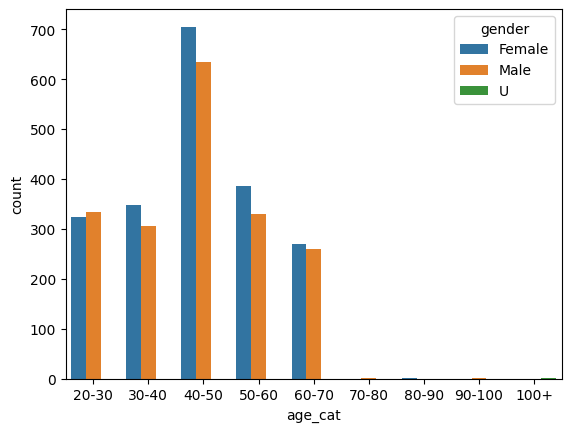

In [30]:
sns.countplot(x='age_cat',hue='gender',data=df_custdemo)

In [42]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'age', 'age_cat'],
      dtype='object')

In [11]:
df['profit'] = df['list_price'] - df['standard_cost']

<AxesSubplot: xlabel='job_industry_category', ylabel='count'>

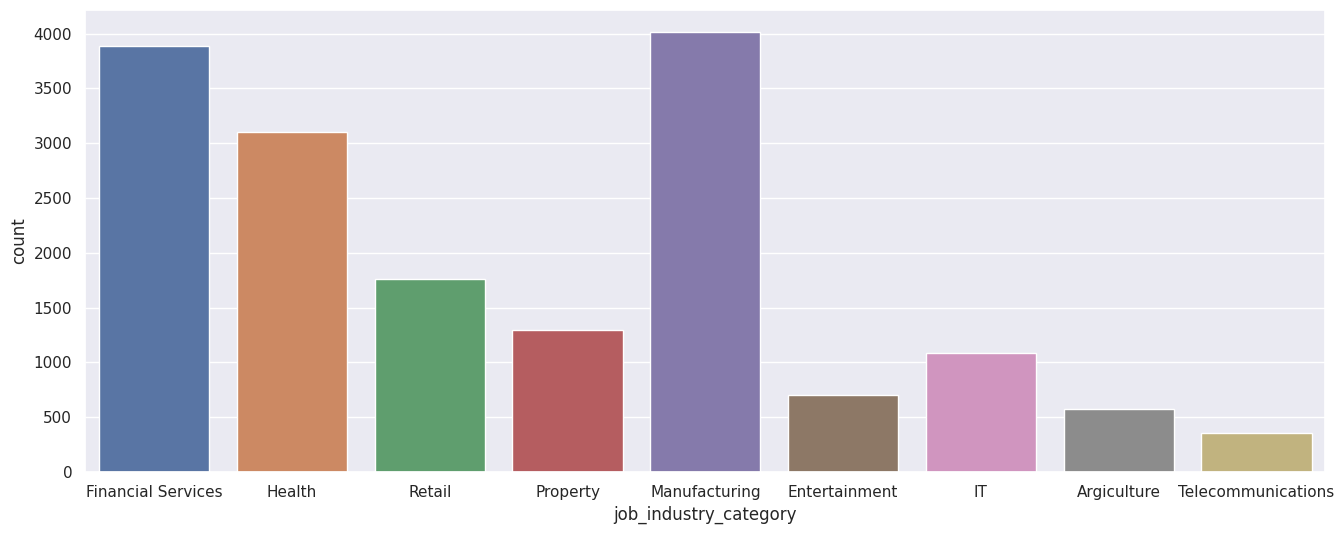

In [62]:
sns.set(rc={'figure.figsize':(16,6)})
sns.countplot(x='job_industry_category',data=df)

In [59]:
df_grp = df.groupby('job_industry_category')['profit'].sum().reset_index()

In [60]:
df_grp

,job_industry_category,profit
0,Argiculture,302991.35
1,Entertainment,386109.45
2,Financial Services,2153575.18
3,Health,1667645.53
4,IT,606538.42
5,Manufacturing,2167718.16
6,Property,703502.06
7,Retail,982011.36
8,Telecommunications,187400.01


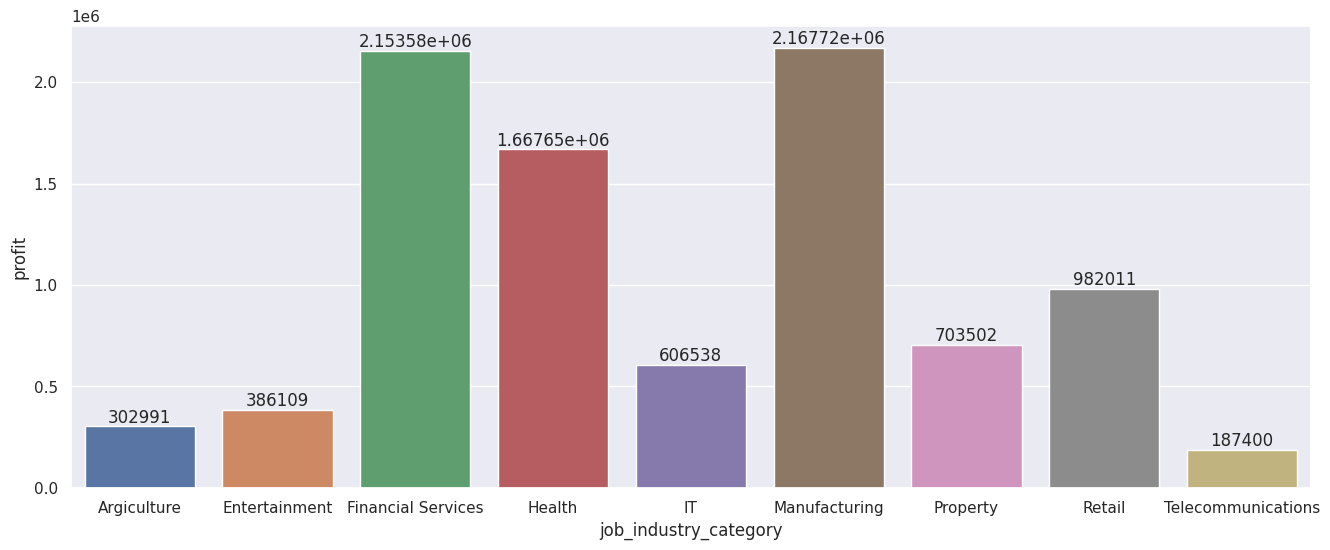

In [63]:
ax = sns.barplot(x='job_industry_category',y='profit',data=df_grp)
for i in ax.containers:
    ax.bar_label(i,)

In [31]:
df_tf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [32]:
df_custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_cat
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,60-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0,60-70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,60-70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,40-50


In [9]:
df = pd.merge(df_tf, df_custdemo, left_on='customer_id', right_on='customer_id', how='left')

In [10]:
df = pd.merge(df,df_custaddr,left_on='customer_id',right_on='customer_id',how='left')

In [67]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'age', 'age_cat', 'profit', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

<AxesSubplot: xlabel='state', ylabel='count'>

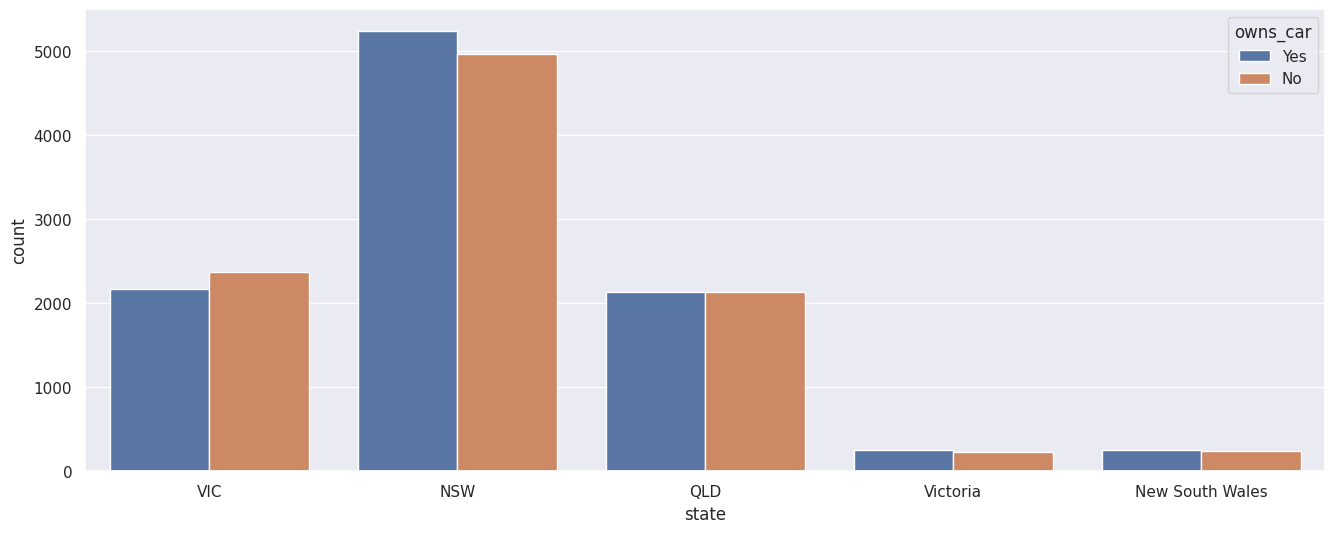

In [69]:
sns.countplot(x='state',data=df,hue='owns_car')

In [75]:
df.shape

(20000, 33)

In [77]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'age', 'age_cat', 'profit', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [85]:
tgt_mkt = df[df.state.isin(['VLC','NSW','QLD'])][(df['gender']=='Female') & (df['owns_car'] == 'Yes')][['customer_id','first_name','last_name']]

/tmp/ipykernel_3084/3543299809.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tgt_mkt = df[df.state.isin(['VLC','NSW','QLD'])][(df['gender']=='Female') & (df['owns_car'] == 'Yes')][['customer_id','first_name','last_name']]


In [86]:
tgt_mkt.to_csv('mkt.csv',index=False)

In [12]:
df.to_csv('Merged_df.csv',index=False)